In [1]:
cd ThinkBayes2-master/code/

/Users/martin/Documents/bitbucket/thinkbayes/ThinkBayes2-master/code


In [2]:
%matplotlib inline

No handles with labels found to put in legend.


No handles with labels found to put in legend.


0.02097652612954468
MLE 56
Mean 55.952380952380956
Median 56
5th %ile 51
95th %ile 61
CI (51, 61)
0.02384753721469363
MLE 56
Mean 55.74349943859506
Median 56
5th %ile 51
95th %ile 61
CI (51, 61)


No handles with labels found to put in legend.


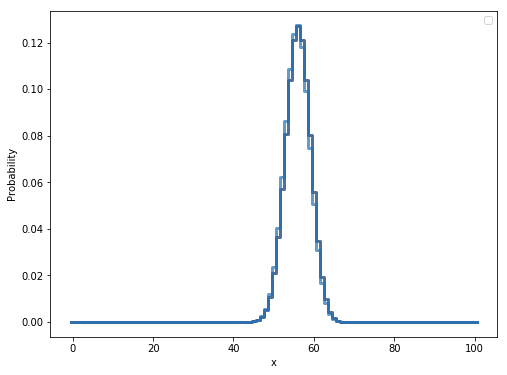

<Figure size 576x432 with 0 Axes>

In [6]:
# %load euro.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""

import thinkbayes2
import thinkplot


class Euro(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x


class Euro2(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


def UniformPrior():
    """Makes a Suite with a uniform prior."""
    suite = Euro(range(0, 101))
    return suite


def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite


def RunUpdate(suite, heads=140, tails=110):
    """Updates the Suite with the given number of heads and tails.

    suite: Suite object
    heads: int
    tails: int
    """
    dataset = 'H' * heads + 'T' * tails

    for data in dataset:
        suite.Update(data)


def Summarize(suite):
    """Prints summary statistics for the suite."""
    print(suite.Prob(50))

    print('MLE', suite.MaximumLikelihood())

    print('Mean', suite.Mean())
    print('Median', suite.Percentile(50)) 

    print('5th %ile', suite.Percentile(5)) 
    print('95th %ile', suite.Percentile(95)) 

    print('CI', suite.CredibleInterval(90))


def PlotSuites(suites, root):
    """Plots two suites.

    suite1, suite2: Suite objects
    root: string filename to write
    """
    thinkplot.Clf()
    thinkplot.PrePlot(len(suites))
    thinkplot.Pmfs(suites)

    thinkplot.Show(root=root,
                   xlabel='x',
                   ylabel='Probability'
                   #,formats=['pdf', 'eps']
                  )


def main():
    # make the priors
    suite1 = UniformPrior()
    suite1.name = 'uniform'

    suite2 = TrianglePrior()
    suite2.name = 'triangle'

    # plot the priors
    PlotSuites([suite1, suite2], 'euro2')

    # update
    RunUpdate(suite1)
    Summarize(suite1)

    RunUpdate(suite2)
    Summarize(suite2)

    # plot the posteriors
    PlotSuites([suite1], 'euro1')
    PlotSuites([suite1, suite2], 'euro3')


if __name__ == '__main__':
    main()


In [ ]:
# %load euro2.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""

import thinkbayes2
import thinkplot


class Euro(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x


class Euro2(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


def Version1():
    suite = Euro(range(0, 101))
    heads, tails = 140, 110
    dataset = 'H' * heads + 'T' * tails

    for data in dataset:
        suite.Update(data)

    return suite


def Version2():
    suite = Euro(range(0, 101))
    heads, tails = 140, 110
    dataset = 'H' * heads + 'T' * tails

    suite.UpdateSet(dataset)
    return suite


def Version3():
    suite = Euro2(range(0, 101))
    heads, tails = 140, 110

    suite.Update((heads, tails))
    return suite


def main():

    suite = Version3()
    print(suite.Mean())

    thinkplot.Pdf(suite)
    thinkplot.Show(legend=False)


if __name__ == '__main__':
    main()


In [ ]:
# %load euro3.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."

    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:

        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'

MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""

import thinkbayes2


class Euro(thinkbayes2.Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite


def SuiteLikelihood(suite, data):
    """Computes the weighted average of likelihoods for sub-hypotheses.

    suite: Suite that maps sub-hypotheses to probability
    data: some representation of the data
   
    returns: float likelihood
    """
    total = 0
    for hypo, prob in suite.Items():
        like = suite.Likelihood(data, hypo)
        total += prob * like
    return total


def Main():
    data = 140, 110
    data = 8, 12

    suite = Euro()
    like_f = suite.Likelihood(data, 50)
    print('p(D|F)', like_f)

    actual_percent = 100.0 * 140 / 250
    likelihood = suite.Likelihood(data, actual_percent)
    print('p(D|B_cheat)', likelihood)
    print('p(D|B_cheat) / p(D|F)', likelihood / like_f)

    like40 = suite.Likelihood(data, 40)
    like60 = suite.Likelihood(data, 60)
    likelihood = 0.5 * like40 + 0.5 * like60
    print('p(D|B_two)', likelihood)
    print('p(D|B_two) / p(D|F)', likelihood / like_f)

    b_uniform = Euro(range(0, 101))
    b_uniform.Remove(50)
    b_uniform.Normalize()
    likelihood = SuiteLikelihood(b_uniform, data)
    print('p(D|B_uniform)', likelihood)
    print('p(D|B_uniform) / p(D|F)', likelihood / like_f)

    b_tri = TrianglePrior()
    b_tri.Remove(50)
    b_tri.Normalize()
    likelihood = b_tri.Update(data)
    print('p(D|B_tri)', likelihood)
    print('p(D|B_tri) / p(D|F)', likelihood / like_f)


if __name__ == '__main__':
    Main()


In [14]:
help(Beta)

Help on class Beta in module thinkbayes2:

class Beta(builtins.object)
 |  Represents a Beta distribution.
 |  
 |  See http://en.wikipedia.org/wiki/Beta_distribution
 |  
 |  Methods defined here:
 |  
 |  EvalPdf(self, x)
 |      Evaluates the PDF at x.
 |  
 |  MAP(self)
 |      Computes the value with maximum a posteori probability.
 |  
 |  MakeCdf(self, steps=101)
 |      Returns the CDF of this distribution.
 |  
 |  MakePmf(self, steps=101, label=None)
 |      Returns a Pmf of this distribution.
 |      
 |      Note: Normally, we just evaluate the PDF at a sequence
 |      of points and treat the probability density as a probability
 |      mass.
 |      
 |      But if alpha or beta is less than one, we have to be
 |      more careful because the PDF goes to infinity at x=0
 |      and x=1.  In that case we evaluate the CDF and compute
 |      differences.
 |      
 |      The result is a little funny, because the values at 0 and 1
 |      are not symmetric.  Nevertheless, it

In [21]:
ls

CDBRFS08.ASC.gz*               journal.pone.0047712.s001.csv*
Makefile*                      kidney.py*
__pycache__/                   lincoln.py*
blaster.ipynb*                 lincoln_soln.py*
brfss.py*                      loop.py*
btp01.ipynb*                   m_and_m.py*
btp01soln.ipynb*               monty.py*
chap02.ipynb*                  monty2.py*
chap02soln.ipynb*              paintball.py*
chap03.ipynb*                  price.py*
chap03soln.ipynb*              redline.py*
chap04.ipynb*                  redline_data.py*
chap04soln.ipynb*              sat.py*
chap05.ipynb*                  sat2.py*
chap05soln.ipynb*              sat2_soln.py*
chap07.ipynb*                  sat_ranks.csv*
chap07soln.ipynb*              sat_scale.csv*
chap09.ipynb*                  showcases.2011.csv*
chap09soln.ipynb*              showcases.2012.csv*
chap11soln.ipynb*              soccer.py*
columns.py*                    soccer2.py*
cookie.py*                     soccer2_soln.py*
cookie2.py*